# Missing Values
---

**Purpose:**

Experimenting the issues with leaving values as blanks and different techniques to handle them

1. [Zero](#Zero-Fill)
1. [Average](#Average)
1. [Rolling Average](#Rolling-Average)
1. [Back Fill](#Back-Fill)
1. [Forward Fill](#Forward-Fill)
1. [Pad](#Pad-Interpolation)
1. [Linear](#Linear-Interpolation)
1. [Polynomial](#Polynomial-Interpolation)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("bmh")

In [2]:
df = pd.DataFrame(
{
    'period':range(2000, 2011),
    'col1': [296. ,  321,  369,  450, 499 , 577,  708,  923, 1209, 1294, 1492]
})

df['col2'] = df['col1'].copy()

df.set_index(['period'], inplace=True)
df

,col1,col2
period,,
2000,296.0,296.0
2001,321.0,321.0
2002,369.0,369.0
2003,450.0,450.0
2004,499.0,499.0
2005,577.0,577.0
2006,708.0,708.0
2007,923.0,923.0
2008,1209.0,1209.0


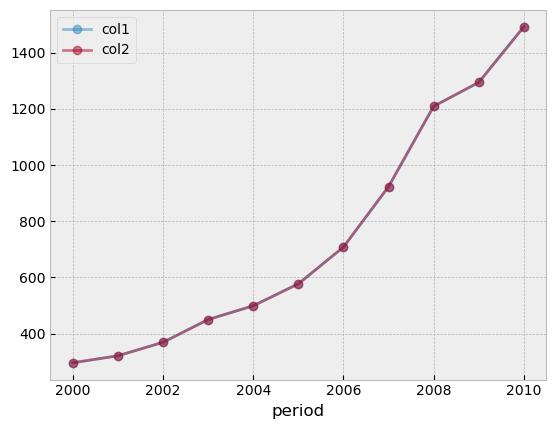

In [3]:
df.plot(alpha=.5, marker='o');

In [4]:
beg, end = 2005, 2008

df.loc[beg:end, ]

,col1,col2
period,,
2005,577.0,577.0
2006,708.0,708.0
2007,923.0,923.0
2008,1209.0,1209.0


### Zero Fill
---

In [5]:
df.loc[beg:end, ['col2']] = None
df['col3'] = df['col2'].fillna(0)
df.describe()

,col1,col2,col3
count,11.000000,7.000000,11.000000
mean,739.818182,674.428571,429.181818
std,424.968427,499.139545,515.038992
min,296.000000,296.000000,0.000000
25%,409.500000,345.000000,0.000000
50%,577.000000,450.000000,321.000000
75%,1066.000000,896.500000,474.500000
max,1492.000000,1492.000000,1492.000000


In [6]:
(df['col1'] - df['col3'])

period
2000       0.0
2001       0.0
2002       0.0
2003       0.0
2004       0.0
2005     577.0
2006     708.0
2007     923.0
2008    1209.0
2009       0.0
2010       0.0
dtype: float64

In [7]:
(df['col1'] - df['col3']).mad()

AttributeError: 'Series' object has no attribute 'mad'

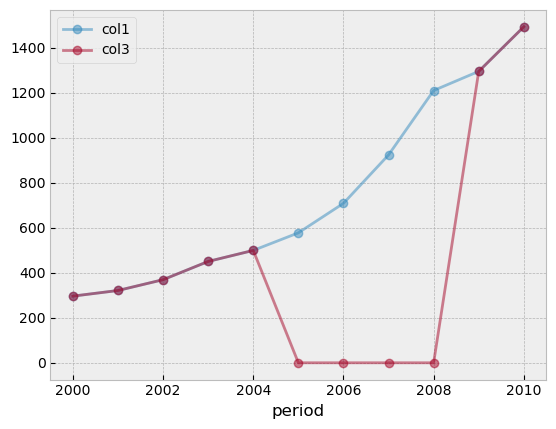

In [8]:
df[['col1','col3']].plot(alpha=.5, marker='o'); 

### Average
---

In [9]:
df.loc[beg:end, ['col2']] = None

avg = df['col2'].mean()
df['col3'] = df['col2'].fillna(avg)

df.describe()

,col1,col2,col3
count,11.000000,7.000000,11.000000
mean,739.818182,674.428571,674.428571
std,424.968427,499.139545,386.631829
min,296.000000,296.000000,296.000000
25%,409.500000,345.000000,409.500000
50%,577.000000,450.000000,674.428571
75%,1066.000000,896.500000,674.428571
max,1492.000000,1492.000000,1492.000000


In [10]:
(df['col1'] - df['col3'])

period
2000      0.000000
2001      0.000000
2002      0.000000
2003      0.000000
2004      0.000000
2005    -97.428571
2006     33.571429
2007    248.571429
2008    534.571429
2009      0.000000
2010      0.000000
dtype: float64

In [11]:
(df['col1'] - df['col3']).mad()

AttributeError: 'Series' object has no attribute 'mad'

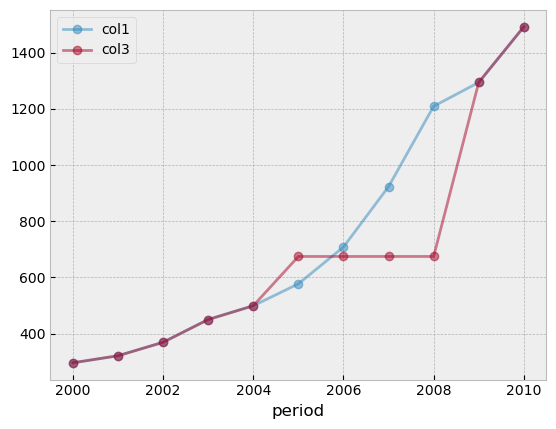

In [12]:
df[['col1','col3']].plot(alpha=.5, marker='o'); 

### Rolling Average
---

In [13]:
df.loc[beg:end, ['col2']] = None

rolling = df['col2'].rolling(window=6, min_periods=2).mean()

df['col3'] = df['col2'].fillna(rolling)

df.describe()

,col1,col2,col3
count,11.000000,7.000000,11.000000
mean,739.818182,674.428571,584.689394
std,424.968427,499.139545,406.714707
min,296.000000,296.000000,296.000000
25%,409.500000,345.000000,378.000000
50%,577.000000,450.000000,439.333333
75%,1066.000000,896.500000,486.750000
max,1492.000000,1492.000000,1492.000000


In [14]:
(df['col1'] - df['col3'])

period
2000      0.000000
2001      0.000000
2002      0.000000
2003      0.000000
2004      0.000000
2005    190.000000
2006    298.250000
2007    483.666667
2008    734.500000
2009      0.000000
2010      0.000000
dtype: float64

In [15]:
#(df['col1'] - df['col3']).mad()

AttributeError: 'Series' object has no attribute 'mad'

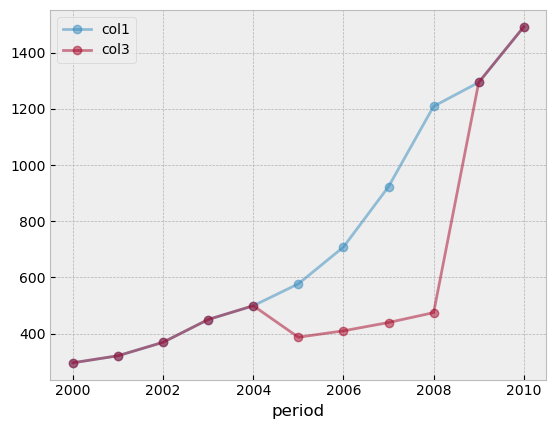

In [16]:
df[['col1','col3']].plot(alpha=.5, marker='o'); 

### Back Fill
---

In [18]:
df.loc[beg:end, ['col2']] = None

#df['col3'] = df['col2'].fillna(method='bfill')
df['col3'] = df['col2'].bfill()

df.describe()

,col1,col2,col3
count,11.000000,7.000000,11.000000
mean,739.818182,674.428571,899.727273
std,424.968427,499.139545,497.188313
min,296.000000,296.000000,296.000000
25%,409.500000,345.000000,409.500000
50%,577.000000,450.000000,1294.000000
75%,1066.000000,896.500000,1294.000000
max,1492.000000,1492.000000,1492.000000


In [19]:
(df['col1'] - df['col3'])

period
2000      0.0
2001      0.0
2002      0.0
2003      0.0
2004      0.0
2005   -717.0
2006   -586.0
2007   -371.0
2008    -85.0
2009      0.0
2010      0.0
dtype: float64

In [21]:
#(df['col1'] - df['col3']).mad()

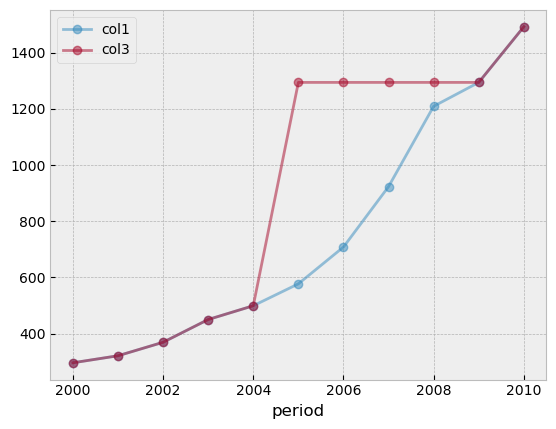

In [22]:
df[['col1','col3']].plot(alpha=.5, marker='o'); 

### Forward Fill
---

In [23]:
df.loc[beg:end, ['col2']] = None

#df['col3'] = df['col2'].fillna(method='ffill')
df['col3'] = df['col2'].ffill()

df.describe()

,col1,col2,col3
count,11.000000,7.000000,11.000000
mean,739.818182,674.428571,610.636364
std,424.968427,499.139545,396.633149
min,296.000000,296.000000,296.000000
25%,409.500000,345.000000,409.500000
50%,577.000000,450.000000,499.000000
75%,1066.000000,896.500000,499.000000
max,1492.000000,1492.000000,1492.000000


In [24]:
(df['col1'] - df['col3'])

period
2000      0.0
2001      0.0
2002      0.0
2003      0.0
2004      0.0
2005     78.0
2006    209.0
2007    424.0
2008    710.0
2009      0.0
2010      0.0
dtype: float64

In [25]:
#(df['col1'] - df['col3']).mad()

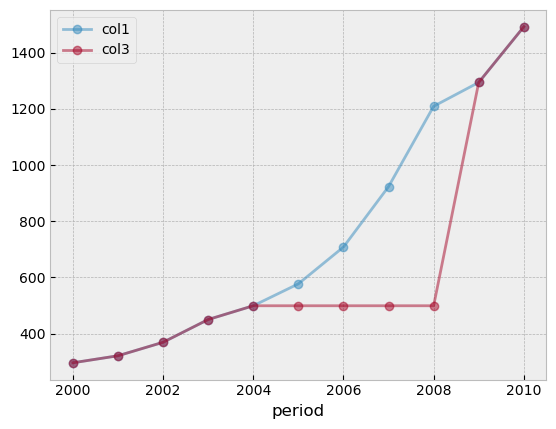

In [26]:
df[['col1','col3']].plot(alpha=.5, marker='o'); 

### Pad Interpolation
---

In [28]:
df.loc[beg:end, ['col2']] = None

#df['col3'] = df['col2'].interpolate(method='pad')
#Use obj.ffill() or obj.bfill() instead.

df.describe()

,col1,col2,col3
count,11.000000,7.000000,11.000000
mean,739.818182,674.428571,610.636364
std,424.968427,499.139545,396.633149
min,296.000000,296.000000,296.000000
25%,409.500000,345.000000,409.500000
50%,577.000000,450.000000,499.000000
75%,1066.000000,896.500000,499.000000
max,1492.000000,1492.000000,1492.000000


In [29]:
(df['col1'] - df['col3'])

period
2000      0.0
2001      0.0
2002      0.0
2003      0.0
2004      0.0
2005     78.0
2006    209.0
2007    424.0
2008    710.0
2009      0.0
2010      0.0
dtype: float64

In [30]:
#(df['col1'] - df['col3']).mad()

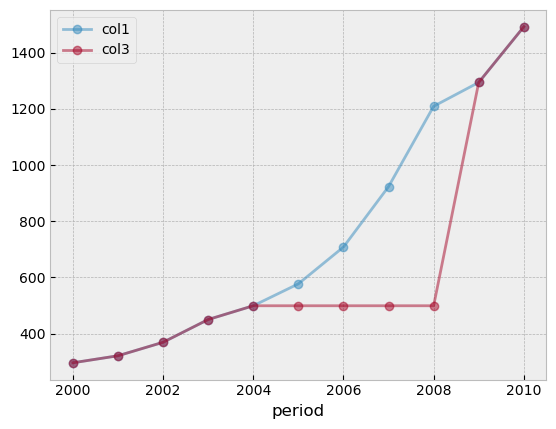

In [31]:
df[['col1','col3']].plot(alpha=.5, marker='o'); 

### Linear Interpolation
---

In [32]:
df.loc[beg:end, ['col2']] = None

df['col3'] = df['col2'].interpolate(method='linear')

df.describe()

,col1,col2,col3
count,11.000000,7.000000,11.000000
mean,739.818182,674.428571,755.181818
std,424.968427,499.139545,417.944690
min,296.000000,296.000000,296.000000
25%,409.500000,345.000000,409.500000
50%,577.000000,450.000000,658.000000
75%,1066.000000,896.500000,1055.500000
max,1492.000000,1492.000000,1492.000000


In [33]:
(df['col1'] - df['col3'])

period
2000      0.0
2001      0.0
2002      0.0
2003      0.0
2004      0.0
2005    -81.0
2006   -109.0
2007    -53.0
2008     74.0
2009      0.0
2010      0.0
dtype: float64

In [34]:
#(df['col1'] - df['col3']).mad()

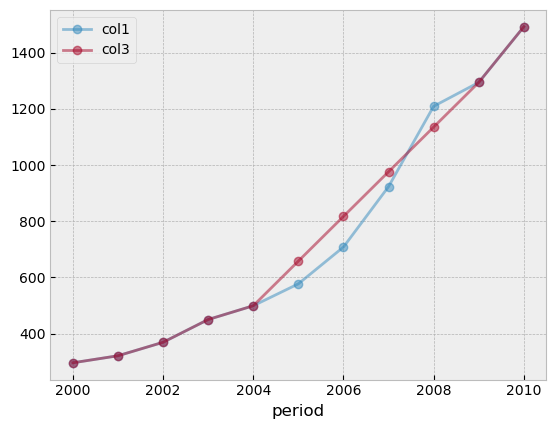

In [35]:
df[['col1','col3']].plot(alpha=.5, marker='o');

### Polynomial Interpolation
---

In [36]:
df.loc[beg:end, ['col2']] = None

df['col3'] = df['col2'].interpolate(method='polynomial', order=3)

df.describe()

,col1,col2,col3
count,11.000000,7.000000,11.000000
mean,739.818182,674.428571,728.621471
std,424.968427,499.139545,411.653799
min,296.000000,296.000000,296.000000
25%,409.500000,345.000000,409.500000
50%,577.000000,450.000000,585.667482
75%,1066.000000,896.500000,992.883863
max,1492.000000,1492.000000,1492.000000


In [37]:
(df['col1'] - df['col3'])

period
2000      0.000000
2001      0.000000
2002      0.000000
2003      0.000000
2004      0.000000
2005     -8.667482
2006    -14.400978
2007     27.699267
2008    118.533007
2009      0.000000
2010      0.000000
dtype: float64

In [38]:
#(df['col1'] - df['col3']).mad()

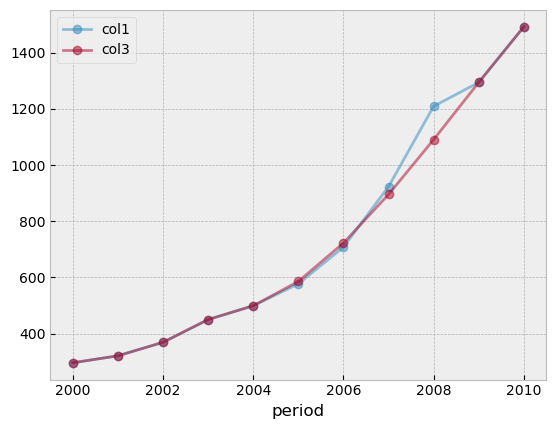

In [39]:
df[['col1','col3']].plot(alpha=.5, marker='o');